# Power Spectral Density

Compute and plot the power spectral density (PSD) of EGG signals using
`plot_psd`. Supports single-channel and multi-channel overlays with
gastric band shading and peak frequency markers.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# Load sample data
egg = gp.load_egg()
signal = egg["signal"]
sfreq = egg["sfreq"]
ch_names = list(egg["ch_names"])

## Single-Channel PSD

Pass a 1D PSD array for a simple single-channel plot.

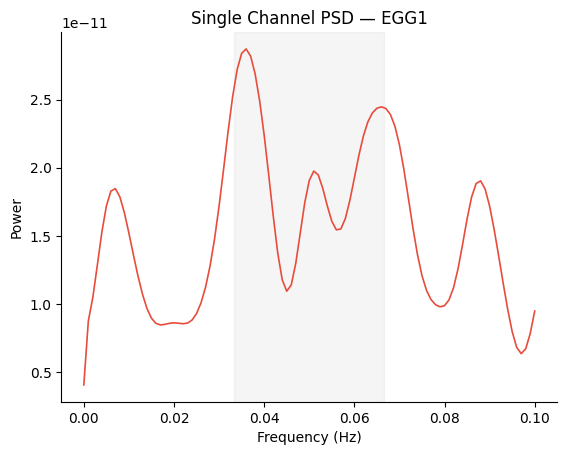

In [3]:
freqs, psd = gp.psd_welch(signal[0], sfreq, fmin=0.0, fmax=0.1, overlap=0.75)

fig, ax = gp.plot_psd(freqs, psd)
ax.set_title(f"Single Channel PSD — {ch_names[0]}")
plt.show()

## Multi-Channel PSD with Best Channel

Pass a 2D array `(n_channels, n_freqs)` to overlay all channels.
Use `best_idx` and `peak_freq` to highlight the strongest channel.

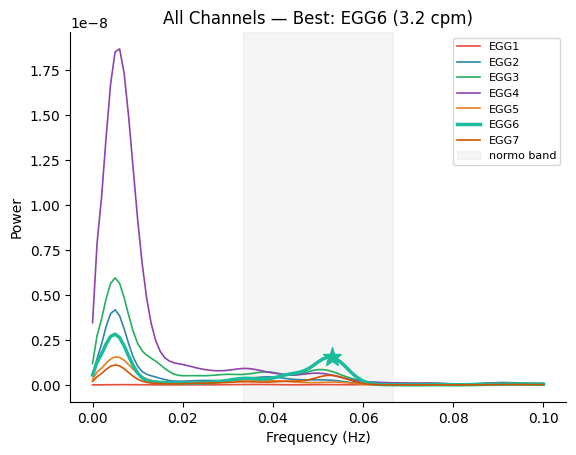

In [4]:
# Compute PSD for all channels
psd_matrix = np.array(
    [gp.psd_welch(signal[i], sfreq, fmin=0.0, fmax=0.1, overlap=0.75)[1] for i in range(signal.shape[0])]
)

# Select best channel
best_idx, peak_freq, _, _ = gp.select_best_channel(signal, sfreq)

fig, ax = gp.plot_psd(
    freqs,
    psd_matrix,
    ch_names=ch_names,
    best_idx=best_idx,
    peak_freq=peak_freq,
)
ax.set_title(f"All Channels — Best: {ch_names[best_idx]} ({peak_freq * 60:.1f} cpm)")
plt.show()

## Custom Band Shading

Shade a different gastric band by passing the `band` parameter.

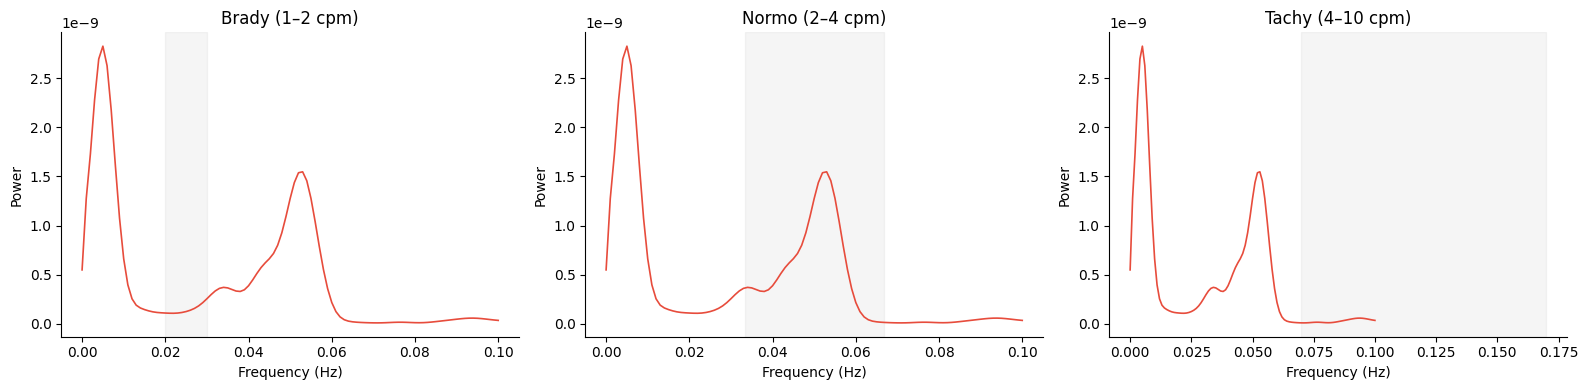

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, band in zip(axes, gp.GASTRIC_BANDS, strict=True):
    gp.plot_psd(freqs, psd_matrix[best_idx], band=band, ax=ax)
    ax.set_title(f"{band.name.capitalize()} ({band.cpm_lo:.0f}–{band.cpm_hi:.0f} cpm)")
fig.tight_layout()
plt.show()

**See also:** [EGG Processing Tutorial](../tutorials/egg_processing.ipynb),
[PSD Parameters](psd_parameters.ipynb),
[Channel Selection](channel_selection.ipynb)